## About the Project:

The donation of blood is important because most often people requiring blood do not receive it on time causing loss of life. Examples include severe accidents, patients suffering from dengue or malaria, or organ transplants. Extreme health conditions such as Leukemia and bone marrow cancer, where affected individuals experience sudden high blood loss and need an urgent supply of blood and do not have it can also lead to loss of life. Sound data-driven systems for tracking and predicting donations and supply needs can improve the entire supply chain, making sure that more patients get the blood transfusions they need, which can reduce mortality risk.

### Aim Of the Project:
To build a model which can identify who is likely to donate blood again.

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import fbeta_score,log_loss,precision_score,recall_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('blood_donation.csv')

In [3]:
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [4]:
print('Number of samples in Train-set: ',data.shape[0])
print('Number of features in train:',data.shape[1])

Number of samples in Train-set:  576
Number of features in train: 6


In [5]:
print('Number of missing data points in Train-set: ',data.isna().sum().sum())

Number of missing data points in Train-set:  0


### Univariate Analysis

In [6]:
# dropping variable Unnamed:0
data.drop('Unnamed: 0',axis=1,inplace=True)

##### Analysing variable "Number of Donations"

In [7]:
# type of 'Number of Donations': It is an integer variable 
data['Number of Donations'].dtype

dtype('int64')

Text(0.5, 1.0, 'Historgram representing Number of Donations')

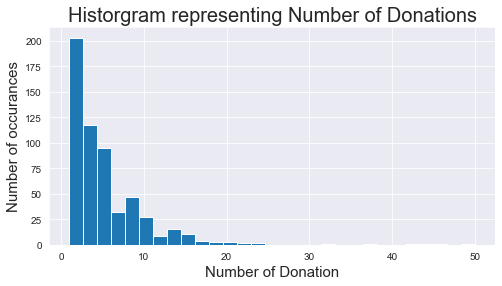

In [8]:
# distribution of number of donations
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
plt.hist(data['Number of Donations'],bins=data['Number of Donations'].nunique())
plt.xlabel('Number of Donation',size=15)
plt.ylabel('Number of occurances',size=15)
plt.title('Historgram representing Number of Donations',size=20)

In [9]:
# top and lowest 'Number of donation':
print('Number of Donations for individual data point:\n',data['Number of Donations'].value_counts())

Number of Donations for individual data point:
 1     118
2      85
3      68
5      53
4      49
6      42
7      32
8      27
9      20
11     16
10     11
12      9
16      8
14      8
13      7
17      4
15      3
19      2
20      2
22      2
24      2
46      1
18      1
21      1
33      1
38      1
43      1
44      1
50      1
Name: Number of Donations, dtype: int64


Observation: 118 people has donated blood only 1 time and there is only 1 person who has dontated blood 50 times. So there is huge variation in this variable.

In [10]:
# describe data:
data['Number of Donations'].describe()

count    576.000000
mean       5.427083
std        5.740010
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       50.000000
Name: Number of Donations, dtype: float64

On an average 5 times blood is denoted by the total of 576 people.

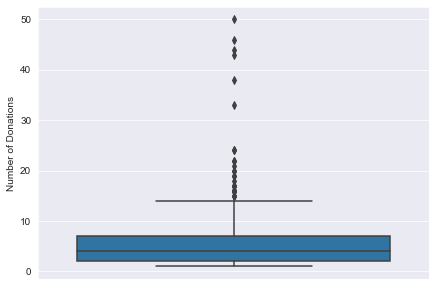

In [11]:
#identify outliers: This feature has outliers.
plt.figure(figsize=(7,5))
sns.boxplot(y=data['Number of Donations'])

##### Analysing "Months Since Last Donation"

In [12]:
# What type of feature is it?
data['Months since Last Donation'].dtype

dtype('int64')

Text(0.5, 1.0, 'Historgram representing "Months since Last Donation"')

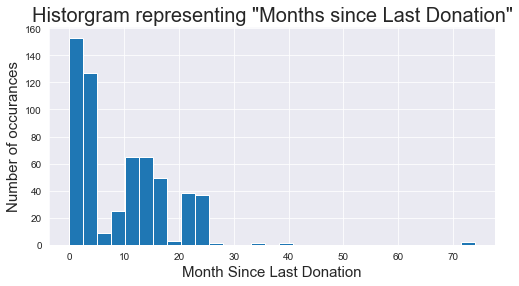

In [13]:
# distribution of variable
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
plt.hist(data['Months since Last Donation'],bins=data['Months since Last Donation'].nunique())
plt.xlabel('Month Since Last Donation',size=15)
plt.ylabel('Number of occurances',size=15)
plt.title('Historgram representing "Months since Last Donation"',size=20)

In [14]:
# variation in this feature
print('Number of occurances for each "Month since last Donation":\n',data['Months since Last Donation'].value_counts())

Number of occurances for each "Month since last Donation":
 2     140
4     115
14     60
11     60
16     48
21     37
23     36
9      17
3      10
1       9
7       5
8       5
12      5
13      4
6       4
0       4
10      3
18      2
5       2
72      1
15      1
17      1
20      1
22      1
25      1
26      1
35      1
39      1
74      1
Name: Months since Last Donation, dtype: int64


Here we can see that most people has donated blood 2 months before the month of March.

In [15]:
data['Months since Last Donation'].describe()

count    576.000000
mean       9.439236
std        8.175454
min        0.000000
25%        2.000000
50%        7.000000
75%       14.000000
max       74.000000
Name: Months since Last Donation, dtype: float64

On an average people are used to donate blood after 9 months(for this sample of data).

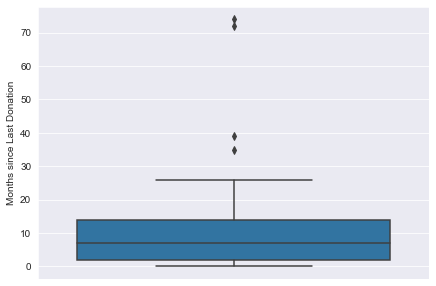

In [16]:
#identify outliers: This feature have very negligible outliers.
plt.figure(figsize=(7,5))
sns.boxplot(y=data['Months since Last Donation'])

##### Analysing feature "Month since First Donation"

In [17]:
# tpye of variable
data['Months since First Donation'].dtype

dtype('int64')

Text(0.5, 1.0, 'Historgram representing "Months since First Donation"')

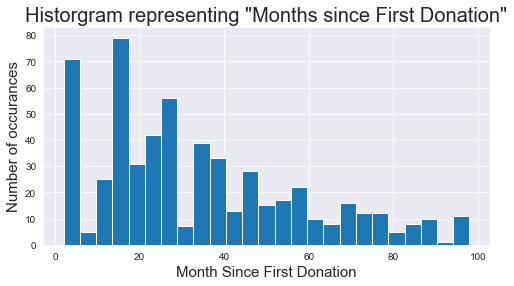

In [18]:
# distribution of variable
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
plt.hist(data['Months since First Donation'],bins=25)
plt.xlabel('Month Since First Donation',size=15)
plt.ylabel('Number of occurances',size=15)
plt.title('Historgram representing "Months since First Donation"',size=20)

In [19]:
data['Months since First Donation'].value_counts().head(20)

16    42
4     39
14    34
2     31
28    29
23    27
21    26
26    24
35    22
11    21
58    13
52    13
38    12
40    11
46    11
41     9
98     8
50     8
22     8
70     8
Name: Months since First Donation, dtype: int64

Here we can see that this variable is almost stable, we can see a little bit of skewness in this  variable.

In [20]:
data['Months since First Donation'].describe()

count    576.000000
mean      34.050347
std       24.227672
min        2.000000
25%       16.000000
50%       28.000000
75%       49.250000
max       98.000000
Name: Months since First Donation, dtype: float64

On an average people are donating blood from the last 34 months.

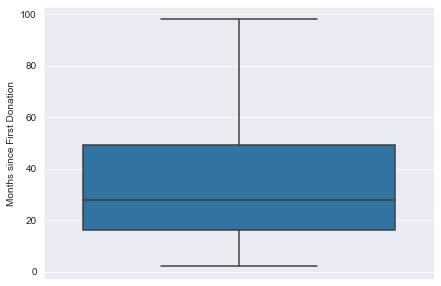

In [21]:
#identify outliers: There are no ouliers in this feature
plt.figure(figsize=(7,5))
sns.boxplot(y=data['Months since First Donation'])

#####  Analysing variable "Total Donations"

In [22]:
# type of feature
data['Total Volume Donated (c.c.)'].dtype

dtype('int64')

Text(0.5, 1.0, 'Historgram representing "Total Volume Donated"')

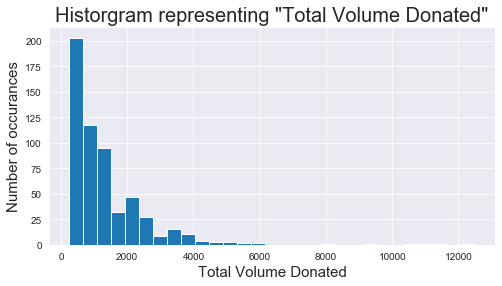

In [23]:
# distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
plt.hist(data['Total Volume Donated (c.c.)'],bins=data['Total Volume Donated (c.c.)'].nunique())
plt.xlabel('Total Volume Donated',size=15)
plt.ylabel('Number of occurances',size=15)
plt.title('Historgram representing "Total Volume Donated"',size=20)

In [24]:
data['Total Volume Donated (c.c.)'].value_counts()

250      118
500       85
750       68
1250      53
1000      49
1500      42
1750      32
2000      27
2250      20
2750      16
2500      11
3000       9
3500       8
4000       8
3250       7
4250       4
3750       3
5000       2
4750       2
6000       2
5500       2
5250       1
11000      1
4500       1
12500      1
11500      1
9500       1
10750      1
8250       1
Name: Total Volume Donated (c.c.), dtype: int64

In [25]:
data['Total Volume Donated (c.c.)'].describe()

count      576.000000
mean      1356.770833
std       1435.002556
min        250.000000
25%        500.000000
50%       1000.000000
75%       1750.000000
max      12500.000000
Name: Total Volume Donated (c.c.), dtype: float64

Minimum Volume of Blood donated is 250cc and the highest vol of Blood donated is 12500cc. On an average each person has donated 1356cc of Blood.

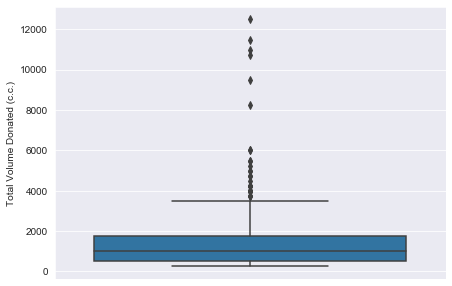

In [26]:
#identify outliers: There are outliers in this feature, so we have to handle them
plt.figure(figsize=(7,5))
sns.boxplot(y=data['Total Volume Donated (c.c.)'])

#### Analysing Dependent Variable

In [27]:
data['Made Donation in March 2007'].dtype

dtype('int64')

In [28]:
# number of data points for each Class
count = data['Made Donation in March 2007'].value_counts()
print('Number of Positive Data poitns: ',count[1])
print('Number of Negative Data poitns: ',count[0])

Number of Positive Data poitns:  138
Number of Negative Data poitns:  438


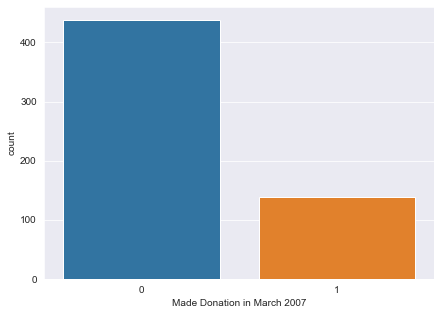

In [29]:
# countplot visualisation
plt.figure(figsize=(7,5))
sns.countplot(data['Made Donation in March 2007'])

The dataset is imbalanced as the number of negative data points is higher than the 

### Correlation

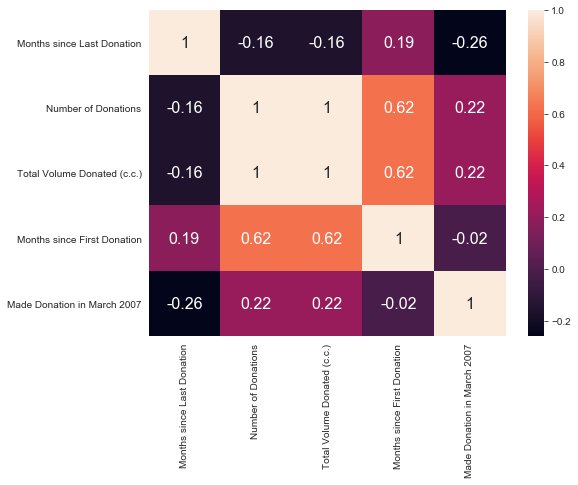

In [30]:
corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,annot_kws={'size':16})

Features are no  corrlated. Now we are good to go ahead.

## Building Model
#### Now we will try to build different models using different data:
1. Logistic Regression

    a) With original Standardised data
    
    b) With Transfomed data
    
    c) With Transfomed + Discretised Data
    
  
2. Random Forest 

    a) With original standardised data
    
    b) With Transfomed data
    
    c) With Transfomed + Discretised Data
    
3. SVC

     a) With original standardised data
    
    b) With Transfomed data
    
    c) With Transfomed + Discretised Data
    
   
3. XGBoost

    a) With original standardised data
    
    b) With Transfomed data
    
    c) With Transfomed + Discretised Data
    


In [31]:
def performance_metrices(model,x_train,y_train,x_test,y_test):
    '''This Function plots all the performance metrices that helps in evaluating the Model'''
    y_predicted = model.predict(x_test)
    print('1. The accuracy of the model on Y-predicted: ',accuracy_score(y_test,y_predicted)*100)
    print('2. Precsion (proption of +ve samples that are actually predicted as +ve): ',precision_score(y_test,y_predicted)*100)
    print('3. Recall(propotion of +ve samples from dataset that are predicted as +ve):',recall_score(y_test,y_predicted)*100)
    print('4. F-Beta-Score :',fbeta_score(y_test,y_predicted,1)*100)
   # print('5. Log-Loss: ',log_loss(y_test,clf.predict_proba(x_test)))
    print('6. Percentage of mis-classified points :', np.count_nonzero((y_predicted-y_test))/y_test.shape[0]*100)

    # Finding roc-curve
    fpr,tpr,thresh = roc_curve(y_test,y_predicted)
    auc = roc_auc_score(y_test,y_predicted)
    print('7. AUC-Score: ',auc*100)
    #Plotting
    sns.set_style('darkgrid')
    fig,ax = plt.subplots(1,2,figsize=(14,4))
    
    #Plotting Confusion Matrix (This code is taken from Kaggle)
    conf_mat = confusion_matrix(y_test, y_predicted)
    labels = [0,1]
    sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels,ax=ax[0],
               annot_kws={"size": 20})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    
    #Plotting ROC-Curve
    ax[1].plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [32]:
# spliting data
X = data.drop('Made Donation in March 2007',axis=1)
y = data['Made Donation in March 2007']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=22)

In [33]:
# standadrdising data
std = StandardScaler()
std_train = pd.DataFrame(std.fit_transform(x_train),columns=x_train.columns)
std_test = pd.DataFrame(std.transform(x_test),columns=x_test.columns)

#### Logistic Regression

1. The accuracy of the model on Y-predicted:  65.27777777777779
2. Precsion (proption of +ve samples that are actually predicted as +ve):  32.8125
3. Recall(propotion of +ve samples from dataset that are predicted as +ve): 75.0
4. F-Beta-Score : 45.65217391304348
6. Percentage of mis-classified points : 34.72222222222222
7. AUC-Score:  68.96551724137932


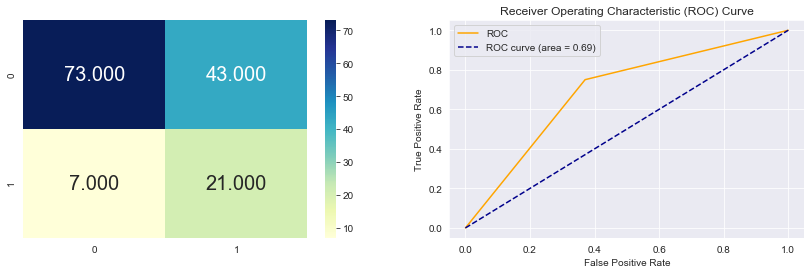

In [34]:
# fitting original standardised data
clf = LogisticRegression(class_weight='balanced',random_state=22)
clf.fit(std_train,y_train)
performance_metrices(clf,std_train,y_train,std_test,y_test)

The model is not too bad but we will try to modify it.

#### Transformation

In [35]:
from feature_engine.variable_transformers import YeoJohnsonTransformer
tf = YeoJohnsonTransformer()
tf_train = tf.fit_transform(std_train)
tf_test = tf.transform(std_test)

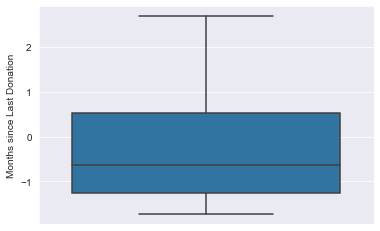

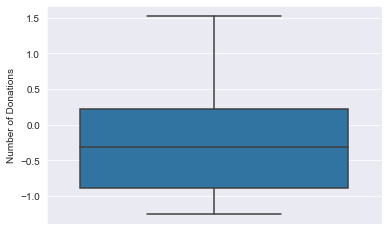

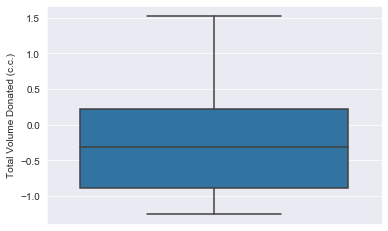

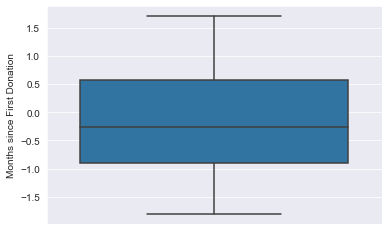

In [36]:
# now let's see of there are oultiers in the data
for i in tf_train.columns:
    plt.figure()
    sns.boxplot(y=tf_train[i])

As we can see now there are no outliers in the data anymore.

1. The accuracy of the model on Y-predicted:  70.13888888888889
2. Precsion (proption of +ve samples that are actually predicted as +ve):  35.294117647058826
3. Recall(propotion of +ve samples from dataset that are predicted as +ve): 64.28571428571429
4. F-Beta-Score : 45.56962025316456
6. Percentage of mis-classified points : 29.86111111111111
7. AUC-Score:  67.91871921182265


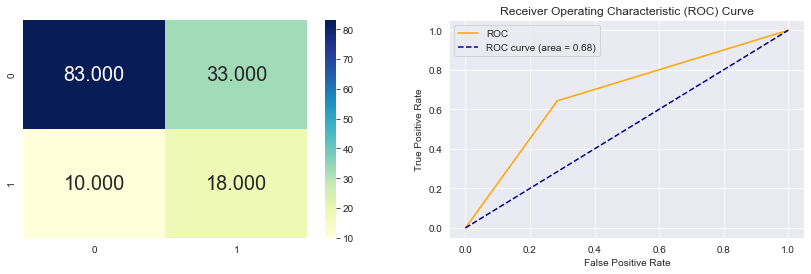

In [37]:
# logistic regression with Transformed data
clf = LogisticRegression(random_state=22,class_weight='balanced')
clf.fit(tf_train,y_train)
performance_metrices(clf,tf_train,y_train,tf_test,y_test)

Perfomed slightly better for the negative points but did poor job for +ve data points.

#### Discretisation

In [38]:
tf_train.nunique()

Months since Last Donation     25
Number of Donations            27
Total Volume Donated (c.c.)    27
Months since First Donation    69
dtype: int64

In [39]:
from feature_engine.discretisers import DecisionTreeDiscretiser
disc = DecisionTreeDiscretiser()
disc_train = disc.fit_transform(tf_train,y_train)
disc_test = disc.transform(tf_test)

1. The accuracy of the model on Y-predicted:  73.61111111111111
2. Precsion (proption of +ve samples that are actually predicted as +ve):  35.294117647058826
3. Recall(propotion of +ve samples from dataset that are predicted as +ve): 42.857142857142854
4. F-Beta-Score : 38.70967741935484
6. Percentage of mis-classified points : 26.38888888888889
7. AUC-Score:  61.94581280788177


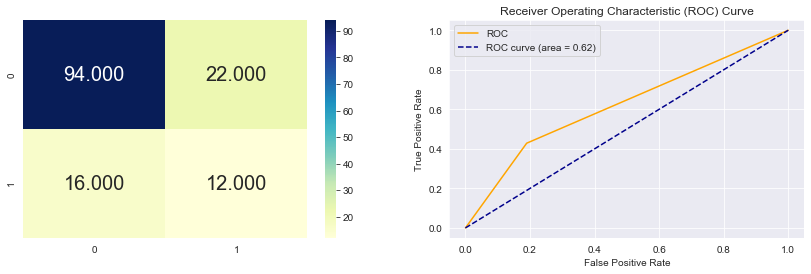

In [40]:
clf = LogisticRegression(random_state=22,class_weight='balanced')
clf.fit(disc_train,y_train)
performance_metrices(clf,disc_train,y_train,disc_test,y_test)

Did not worked well. Because Discretisation works well for Decision Tree based algos.

#### Random Forest

1. The accuracy of the model on Y-predicted:  76.38888888888889
2. Precsion (proption of +ve samples that are actually predicted as +ve):  36.36363636363637
3. Recall(propotion of +ve samples from dataset that are predicted as +ve): 28.57142857142857
4. F-Beta-Score : 32.0
6. Percentage of mis-classified points : 23.61111111111111
7. AUC-Score:  58.251231527093594


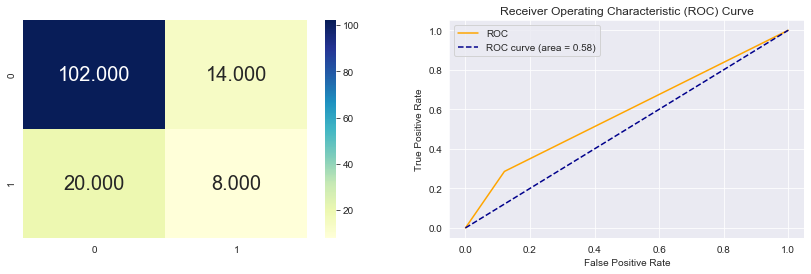

In [71]:
### fitting original data
clf = RandomForestClassifier(class_weight='balanced',random_state=22)
clf.fit(std_train,y_train)
performance_metrices(clf,std_train,y_train,std_test,y_test)

1. The accuracy of the model on Y-predicted:  76.38888888888889
2. Precsion (proption of +ve samples that are actually predicted as +ve):  36.36363636363637
3. Recall(propotion of +ve samples from dataset that are predicted as +ve): 28.57142857142857
4. F-Beta-Score : 32.0
6. Percentage of mis-classified points : 23.61111111111111
7. AUC-Score:  58.251231527093594


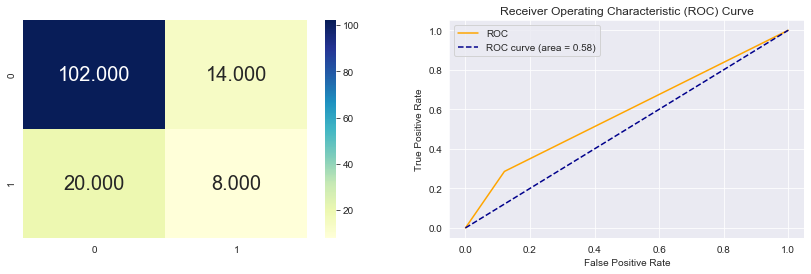

In [41]:
# fitting Transformed data
clf = RandomForestClassifier(class_weight='balanced',random_state=22)
clf.fit(tf_train,y_train)
performance_metrices(clf,tf_train,y_train,tf_test,y_test)

1. The accuracy of the model on Y-predicted:  73.61111111111111
2. Precsion (proption of +ve samples that are actually predicted as +ve):  35.294117647058826
3. Recall(propotion of +ve samples from dataset that are predicted as +ve): 42.857142857142854
4. F-Beta-Score : 38.70967741935484
6. Percentage of mis-classified points : 26.38888888888889
7. AUC-Score:  61.94581280788177


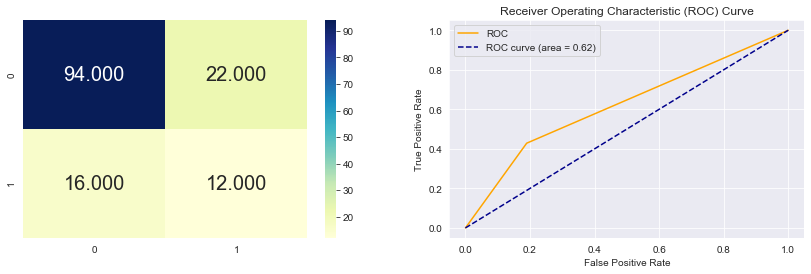

In [42]:
# fitting transformed + disc data
clf = RandomForestClassifier(class_weight='balanced',random_state=22)
clf.fit(disc_train,y_train)
performance_metrices(clf,disc_train,y_train,disc_test,y_test)

So discretisation has increased the genalisation power of the model for Positive data points

In [43]:
import time
start_time = time.clock()
# Hyperparameter tuning for this model
clf = RandomForestClassifier(random_state=22,class_weight='balanced')
grid_param = {
    "n_estimators" : [100,120],
    'max_depth' : range(2,15,1),
    'min_samples_leaf' : range(1,4,1),
    'min_samples_split': range(2,7,1),
    
}

grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1,)
grid_search.fit(disc_train,y_train)
print('Time taken :',time.clock() - start_time, "seconds")

Time taken : 173.90385580000003 seconds


In [44]:
grid_search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

1. The accuracy of the model on Y-predicted:  73.61111111111111
2. Precsion (proption of +ve samples that are actually predicted as +ve):  35.294117647058826
3. Recall(propotion of +ve samples from dataset that are predicted as +ve): 42.857142857142854
4. F-Beta-Score : 38.70967741935484
6. Percentage of mis-classified points : 26.38888888888889
7. AUC-Score:  61.94581280788177


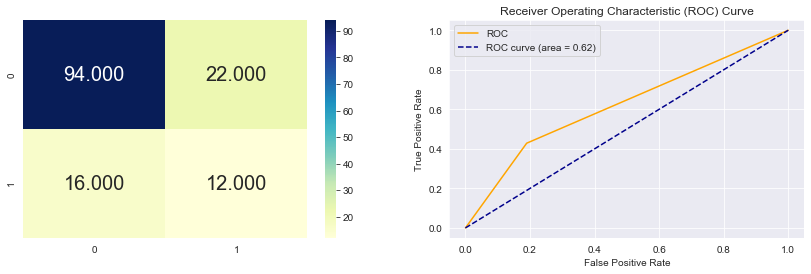

In [45]:
clf = RandomForestClassifier(random_state=22,class_weight='balanced',max_depth=3,min_samples_leaf=1,
                            min_samples_split=2,n_estimators=100)

clf.fit(disc_train,y_train)
performance_metrices(clf,disc_train,y_train,disc_test,y_test)

#### SVM

1. The accuracy of the model on Y-predicted:  63.19444444444444
2. Precsion (proption of +ve samples that are actually predicted as +ve):  28.8135593220339
3. Recall(propotion of +ve samples from dataset that are predicted as +ve): 60.71428571428571
4. F-Beta-Score : 39.08045977011494
6. Percentage of mis-classified points : 36.80555555555556
7. AUC-Score:  62.2536945812808


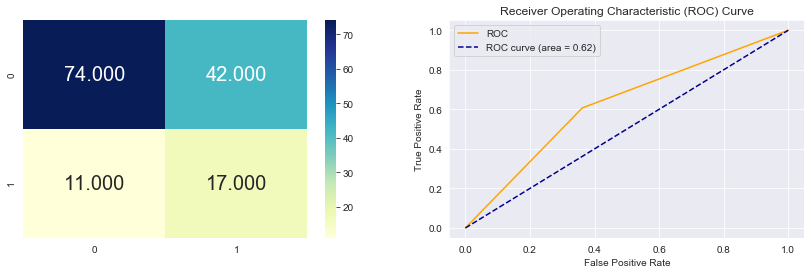

In [80]:
# fitting original std data
clf = SGDClassifier(class_weight='balanced',random_state=22)
clf.fit(std_train,y_train)
performance_metrices(clf,std_train,y_train,std_test,y_test)

1. The accuracy of the model on Y-predicted:  65.27777777777779
2. Precsion (proption of +ve samples that are actually predicted as +ve):  29.629629629629626
3. Recall(propotion of +ve samples from dataset that are predicted as +ve): 57.14285714285714
4. F-Beta-Score : 39.02439024390244
6. Percentage of mis-classified points : 34.72222222222222
7. AUC-Score:  62.19211822660099


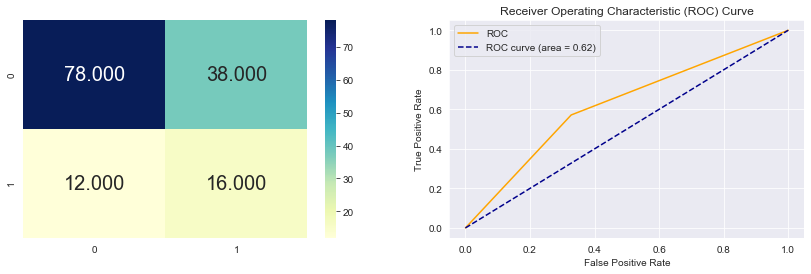

In [81]:
# fitting transformed data
clf = SGDClassifier(class_weight='balanced',random_state=22)
clf.fit(tf_train,y_train)
performance_metrices(clf,tf_train,y_train,tf_test,y_test)

In [115]:
# stadardising transformed data
tr = std.fit_transform(tf_train)
ts = std.transform(tf_test)

1. The accuracy of the model on Y-predicted:  78.47222222222221
2. Precsion (proption of +ve samples that are actually predicted as +ve):  45.714285714285715
3. Recall(propotion of +ve samples from dataset that are predicted as +ve): 57.14285714285714
4. F-Beta-Score : 50.79365079365079
6. Percentage of mis-classified points : 21.52777777777778
7. AUC-Score:  70.38177339901478


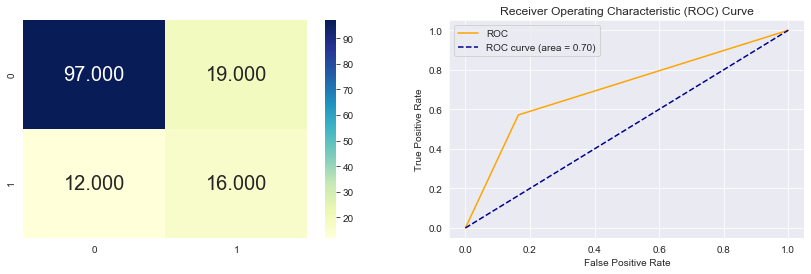

In [83]:
# fitting transformed -> std data 
clf = SGDClassifier(class_weight='balanced',random_state=22)
clf.fit(tr,y_train)
performance_metrices(clf,tr,y_train,ts,y_test)

In [133]:
# Hyperparameter tuning for this modela
alpha = [10 ** a for a in range(-50,1)]
clf = SGDClassifier(class_weight='balanced',random_state=22)
grid_param = {
    "alpha" : alpha,
    "penalty" :['l1','l2']
    
}

grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1,)
grid_search.fit(tr,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=22,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=...
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-50, 1e-49, 1e-48, 1e-47, 1e-46, 1e-45,
                                   1e-44, 1e-43, 1e-42, 1e-41, 1e-40, 1e-39,
                            

In [134]:
grid_search.best_params_

{'alpha': 0.01, 'penalty': 'l2'}

1. The accuracy of the model on Y-predicted:  68.05555555555556
2. Precsion (proption of +ve samples that are actually predicted as +ve):  32.69230769230769
3. Recall(propotion of +ve samples from dataset that are predicted as +ve): 60.71428571428571
4. F-Beta-Score : 42.5
6. Percentage of mis-classified points : 31.944444444444443
7. AUC-Score:  65.27093596059113


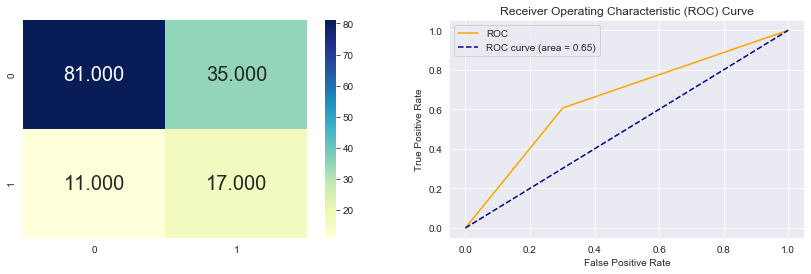

In [113]:
clf = SGDClassifier(random_state=22,class_weight='balanced',alpha=.01,penalty='l2')
clf.fit(tr,y_train)
performance_metrices(clf,tr,y_train,ts,y_test)

## XGBoost

In [116]:
from sklearn.utils.class_weight import compute_sample_weight   # for making class balance 

clf = XGBClassifier()
clf.fit(tr, y_train, sample_weight=compute_sample_weight("balanced", y_train))

[10:05:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

1. The accuracy of the model on Y-predicted:  74.30555555555556
2. Precsion (proption of +ve samples that are actually predicted as +ve):  36.36363636363637
3. Recall(propotion of +ve samples from dataset that are predicted as +ve): 42.857142857142854
4. F-Beta-Score : 39.344262295081975
6. Percentage of mis-classified points : 25.694444444444443
7. AUC-Score:  62.376847290640406


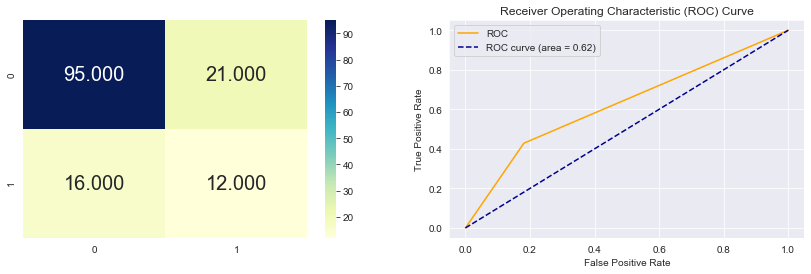

In [117]:
performance_metrices(clf,tr,y_train,ts,y_test)

In [131]:
# original data
clf = XGBClassifier()
clf.fit(x_train, y_train, sample_weight=compute_sample_weight("balanced", y_train))

[10:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

1. The accuracy of the model on Y-predicted:  74.30555555555556
2. Precsion (proption of +ve samples that are actually predicted as +ve):  36.36363636363637
3. Recall(propotion of +ve samples from dataset that are predicted as +ve): 42.857142857142854
4. F-Beta-Score : 39.344262295081975
6. Percentage of mis-classified points : 25.694444444444443
7. AUC-Score:  62.376847290640406


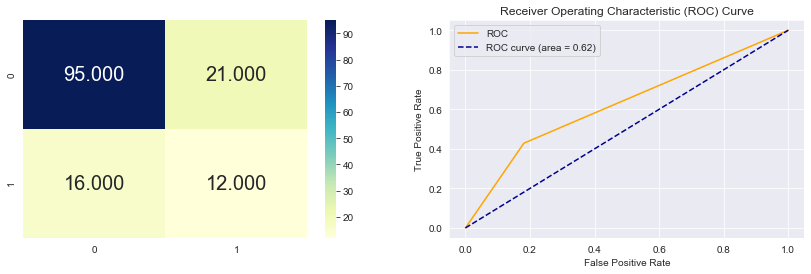

In [132]:
performance_metrices(clf,x_train,y_train,x_test,y_test)

We can see that XGBoost is giving same results for both the original data and the transfomed + standardised data, beacuse it is extremly powerful algorithm.

[13:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1. The accuracy of the model on Y-predicted:  76.38888888888889
2. Precsion (proption of +ve samples that are actually predicted as +ve):  43.18181818181818
3. Recall(propotion of +ve samples from dataset that are predicted as +ve): 67.85714285714286
4. F-Beta-Score : 52.77777777777777
6. Percentage of mis-classified points : 23.61111111111111
7. AUC-Score:  73.15270935960592


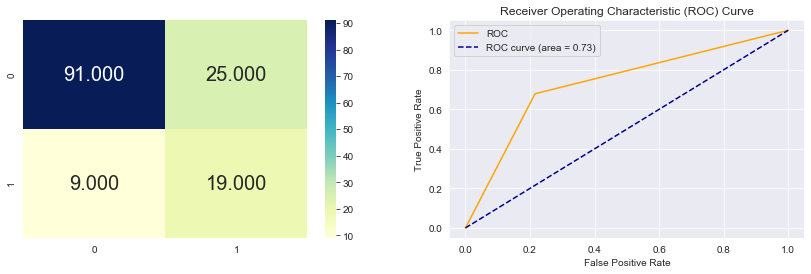

In [170]:
# XGB using best parameters
clf = XGBClassifier(learning_rate= .2, max_depth= 4, gamma=0.5,min_child_weight=4,colsample_bytree=.5,n_estimators=100)
clf.fit(tr, y_train,sample_weight=compute_sample_weight("balanced", y_train))
performance_metrices(clf,tr,y_train,ts,y_test)

In [171]:
print('Train score: {:.2f}'.format(clf.score(tr,y_train)*100))
print('Test score : {:.2f}'.format(clf.score(ts,y_test)*100))

Train score: 77.55
Test score : 76.39


XGBoost is doing a very good job form the rest of the models.

So if we have to choose one model out of all the models that we have built till now, we will pick the XGBoost. The generalisation of the model for the Positive data points is fairly good despite of the class imbalance. 

ROC of this model is 0.73. So, this model can be used to predict that whether the person will donate blood or not.